In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/main/dataset/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv")
test_dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/main/dataset/Titanic%20-%20Machine%20Learning%20from%20Disaster/test.csv")

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train_dataset.Survived.value_counts())
print(f"Number of people that did not survive is {train_dataset.Survived.value_counts()[0]}")
print(f"Number of people that survived is {train_dataset.Survived.value_counts()[1]}")
print(f"Percentage of people that did not survive is {(train_dataset.Survived.value_counts()[0] / train_dataset.Survived.count()) * 100}")
print(f"Percentage of people that survived is {(train_dataset.Survived.value_counts()[1] / train_dataset.Survived.count()) * 100}")

0    549
1    342
Name: Survived, dtype: int64
Number of people that did not survive is 549
Number of people that survived is 342
Percentage of people that did not survive is 61.61616161616161
Percentage of people that survived is 38.38383838383838


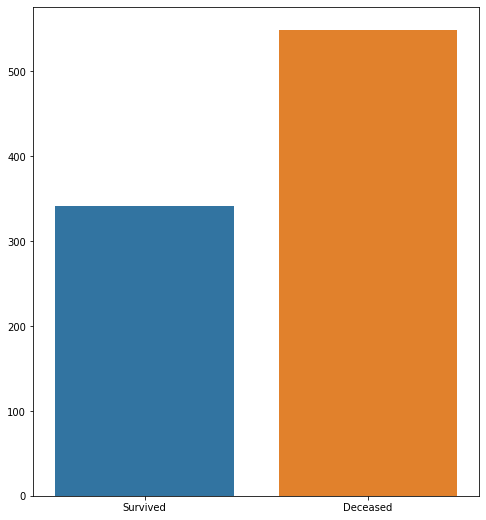

In [6]:
plt.figure(figsize=(8, 9))
survival_labels = ["Survived", "Deceased"]
survival_counts = [train_dataset.Survived.value_counts()[1], train_dataset.Survived.value_counts()[0]]
sns.barplot(survival_labels, survival_counts)
plt.show()

In [7]:
print(f"Male Survival Count: {len(train_dataset[(train_dataset.Survived == 1) & (train_dataset.Sex == 'male')])}")
print(f"Female Survival Count: {len(train_dataset[(train_dataset.Survived == 1) & (train_dataset.Sex == 'female')])}")

Male Survival Count: 109
Female Survival Count: 233


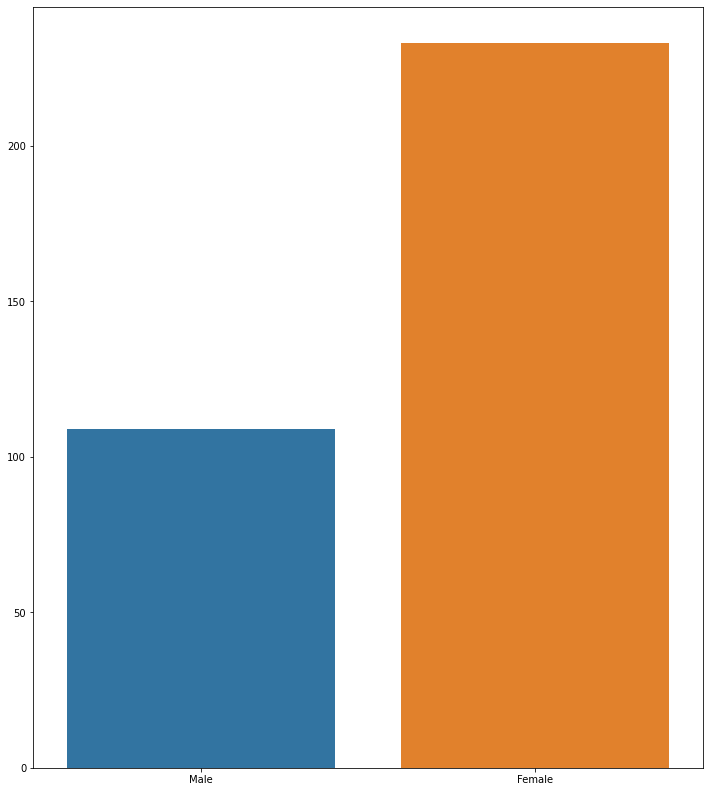

In [8]:
gender_labels = ["Male", "Female"]
gender_survival_counts = [len(train_dataset[(train_dataset.Survived == 1) & (train_dataset.Sex == 'male')]), len(train_dataset[(train_dataset.Survived == 1) & (train_dataset.Sex == 'female')])]
plt.figure(figsize=(12, 14))
sns.barplot(gender_labels, gender_survival_counts)
plt.show()

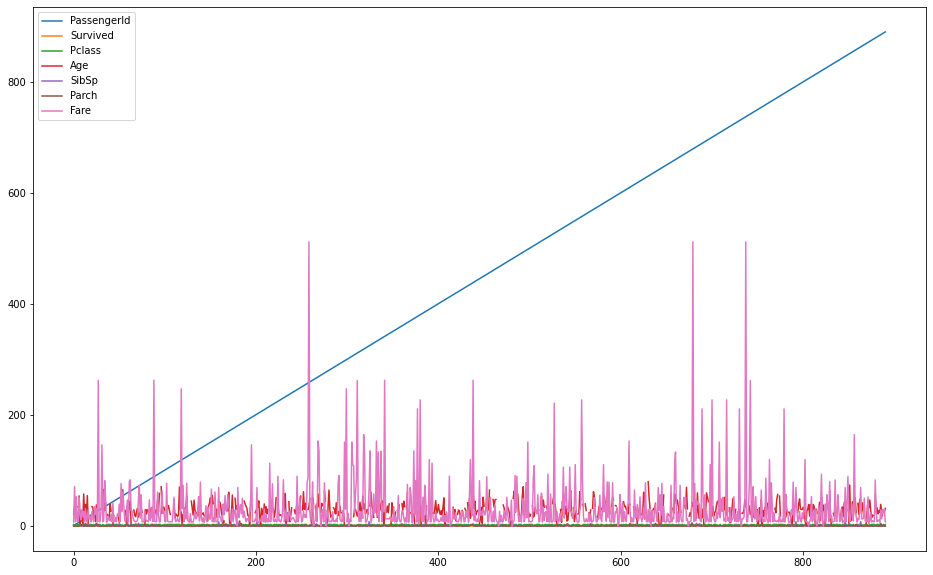

In [9]:
train_dataset.plot(figsize=(16, 10))
plt.show()

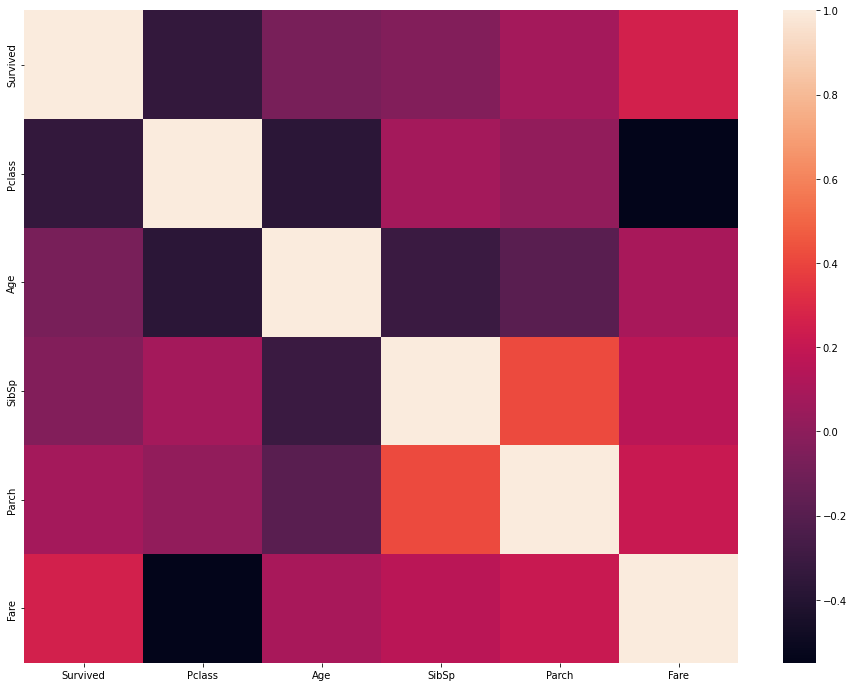

In [10]:
train_dataset_without_passenger_id = train_dataset.drop(["PassengerId"], axis=1)
corr = train_dataset_without_passenger_id.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr)
plt.show()

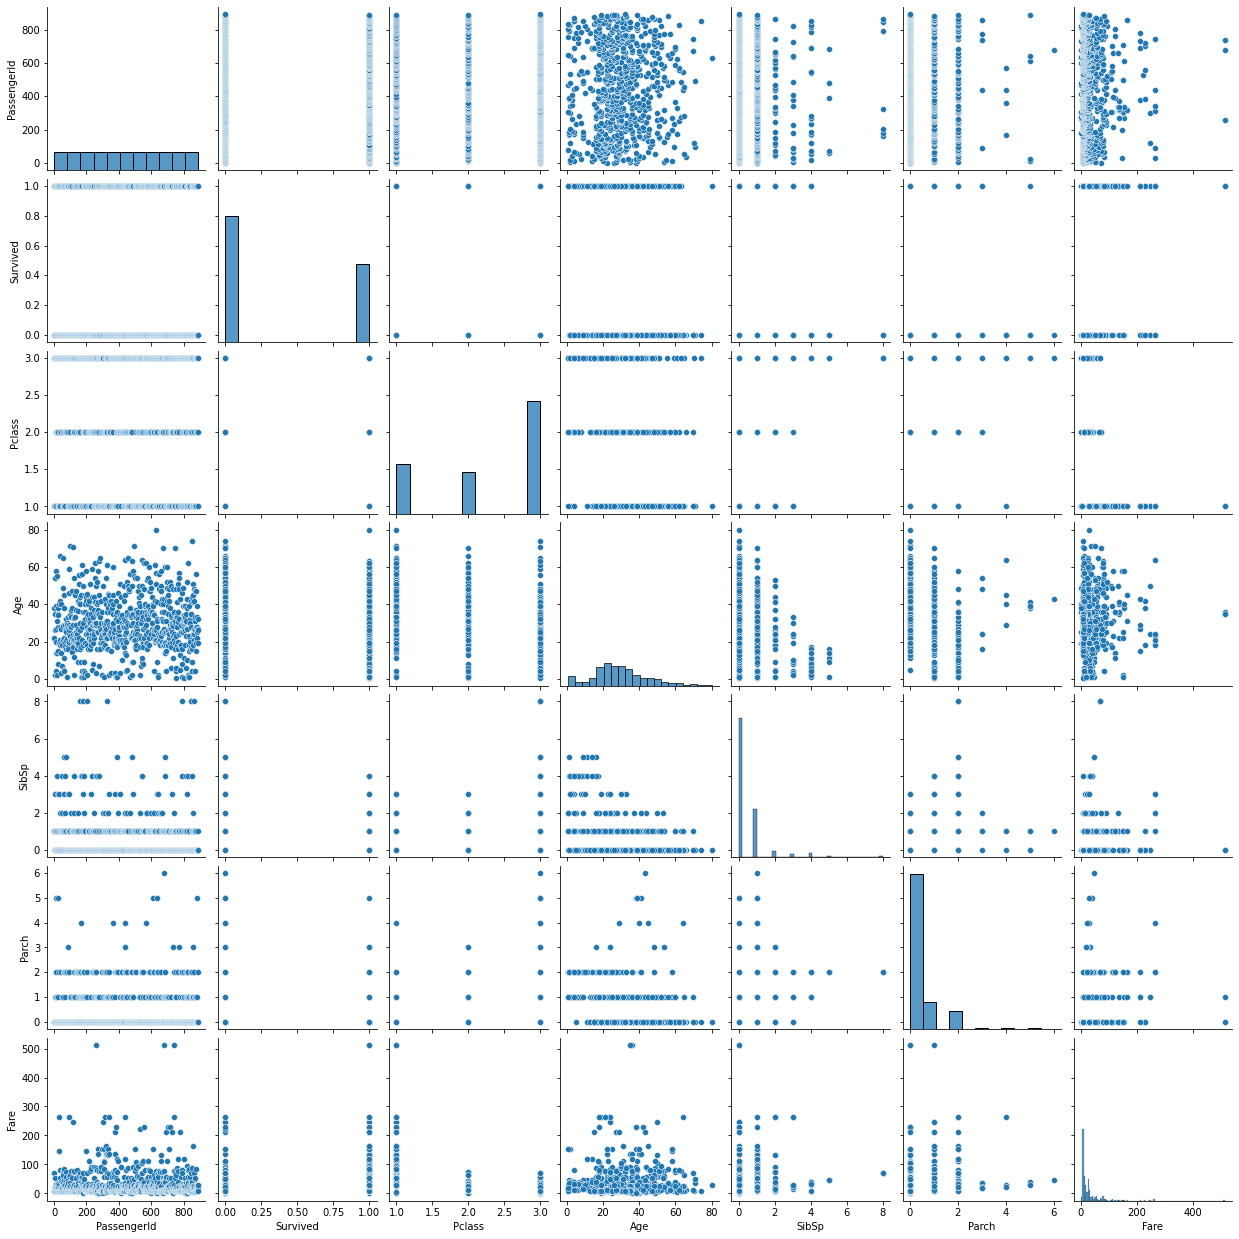

In [11]:
sns.pairplot(train_dataset)
plt.show()

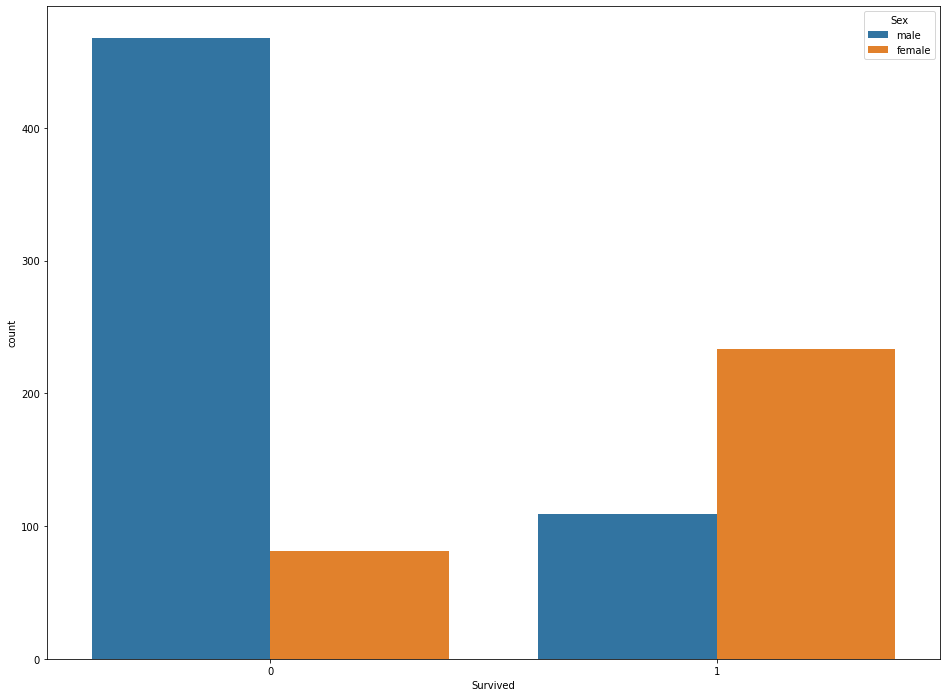

In [12]:
plt.figure(figsize=(16, 12))
sns.countplot(x="Survived", hue="Sex", data=train_dataset)
plt.show()

In [13]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_dataset.shape

(891, 12)

In [16]:
train_dataset = train_dataset.drop("PassengerId", axis=1)

In [17]:
numerical_cols = train_dataset.select_dtypes(exclude=["object"]).columns
print(numerical_cols)

categorical_cols = train_dataset.select_dtypes(['object']).columns
print(categorical_cols)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


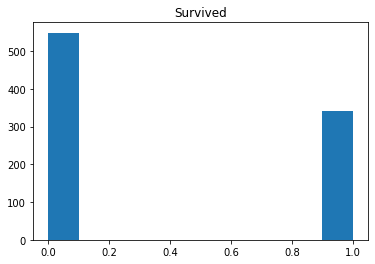

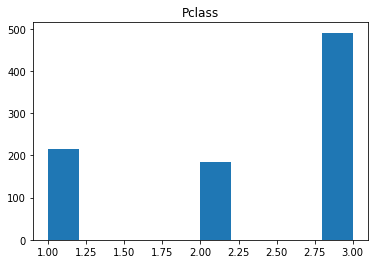

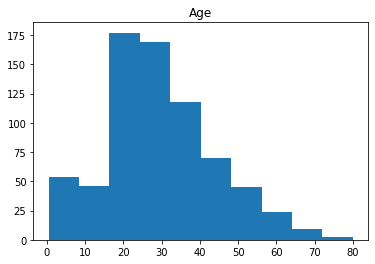

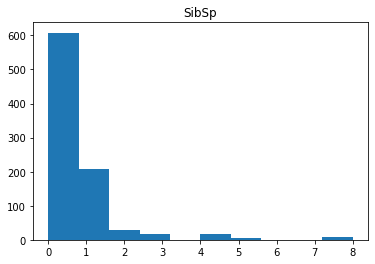

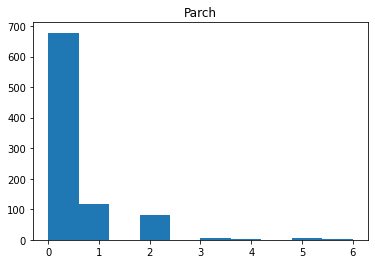

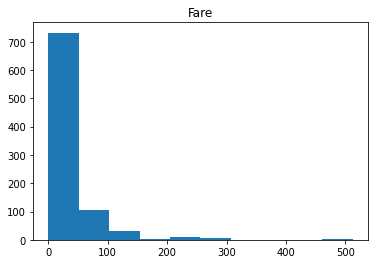

In [18]:
for col in numerical_cols:
    plt.hist(train_dataset[col])
    plt.title(col)
    plt.show()

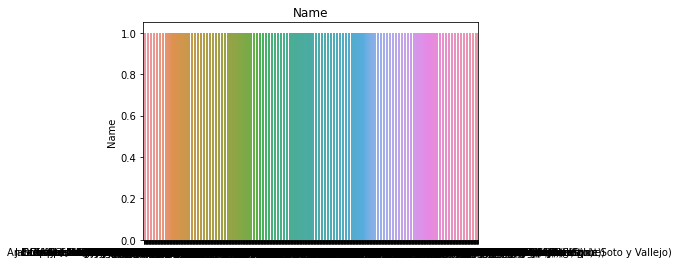

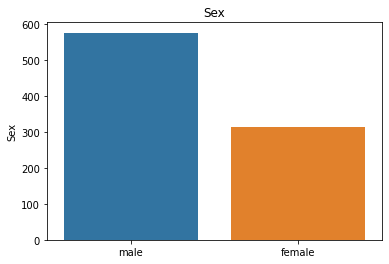

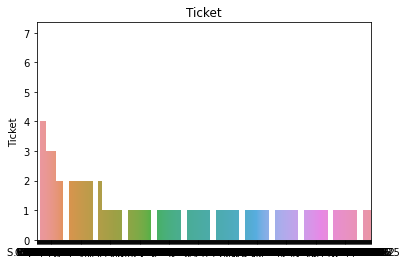

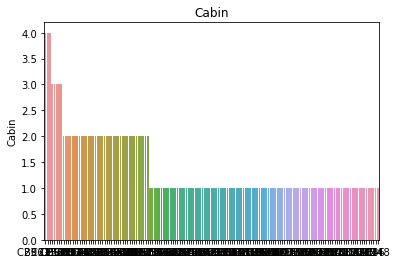

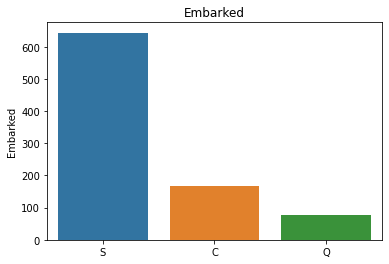

In [19]:
for col in categorical_cols:
    sns.barplot(train_dataset[col].value_counts().index, train_dataset[col].value_counts()).set_title(col)
    plt.show()

In [20]:
for col in train_dataset.columns:
    if col != "Ticket" and col != "Survived":
        print(f"Pivot table for {col} is ")
        print("--------------------------")
        print(pd.pivot_table(train_dataset, index="Survived", columns=col, values="Ticket", aggfunc='count'))
        print()
        print()

Pivot table for Pclass is 
--------------------------
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Pivot table for Name is 
--------------------------
Name      Abbing, Mr. Anthony  Abbott, Mr. Rossmore Edward  \
Survived                                                     
0                         1.0                          1.0   
1                         NaN                          NaN   

Name      Abbott, Mrs. Stanton (Rosa Hunt)  Abelson, Mr. Samuel  \
Survived                                                          
0                                      NaN                  1.0   
1                                      1.0                  NaN   

Name      Abelson, Mrs. Samuel (Hannah Wizosky)  \
Survived                                          
0                                           NaN   
1                                           1.0   

Name      Adahl, Mr. Mauritz Nils Martin  Adams, Mr. John  \
Survived        

In [21]:
nans = train_dataset.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([nans], axis=1, keys=["Total"])

In [22]:
missing_data

,Total
Cabin,687
Age,177
Embarked,2
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


In [23]:
train_dataset = train_dataset.drop(missing_data[missing_data.get("Total") > 177].index, 1)
print(train_dataset.shape)
train_dataset.head()

(891, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
print(test_dataset.shape)
test_dataset.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
X_test = test_dataset.drop(['PassengerId', 'Cabin'], axis=1)
print(X_test.shape)
X_test

(418, 9)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [26]:
train_dataset = train_dataset.drop(["Name"], axis=1)
X_test = X_test.drop(["Name"], axis=1)
print(train_dataset.shape)
print(X_test.shape)

(891, 9)
(418, 8)


In [27]:
train_dataset = train_dataset.drop(train_dataset.loc[train_dataset.get("Embarked").isna()].index)
train_dataset["Age"] = train_dataset["Age"].fillna(train_dataset["Age"].mean())
train_dataset.isna().sum().max()

0

In [28]:
X_test.isna().sum().sort_values(ascending=False)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Ticket       0
Embarked     0
dtype: int64

In [29]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())
X_test.isna().sum().max()

0

In [30]:
train_dataset["Ticket"] = train_dataset["Ticket"].apply(lambda x: float(x.split()[-1]) if len(x.split()) > 1 else 0)
X_test["Ticket"] = X_test["Ticket"].apply(lambda x: float(x.split()[-1]) if len(x.split()) > 1 else 0)

train_dataset["Ticket"].astype(str).astype(float)
X_test["Ticket"].astype(str).astype(float)

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
413       3236.0
414      17758.0
415    3101262.0
416          0.0
417          0.0
Name: Ticket, Length: 418, dtype: float64

In [31]:
categorical_cols = train_dataset.select_dtypes(["object"]).columns
print(categorical_cols)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

Index(['Sex', 'Embarked'], dtype='object')


In [32]:
X = train_dataset.drop(["Survived"], axis=1)
X = ct.fit_transform(X)
X.shape

(889, 11)

In [33]:
X_test = ct.transform(X_test)
X_test.shape

(418, 11)

In [34]:
y = train_dataset["Survived"]
y.shape

(889,)

In [35]:
X.shape

(889, 11)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)

In [38]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [39]:
y_val_predict = classifier.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_predict)

0.6573033707865169

In [40]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_val, y_val_predict)
con_mat

array([[102,   7],
       [ 54,  15]])

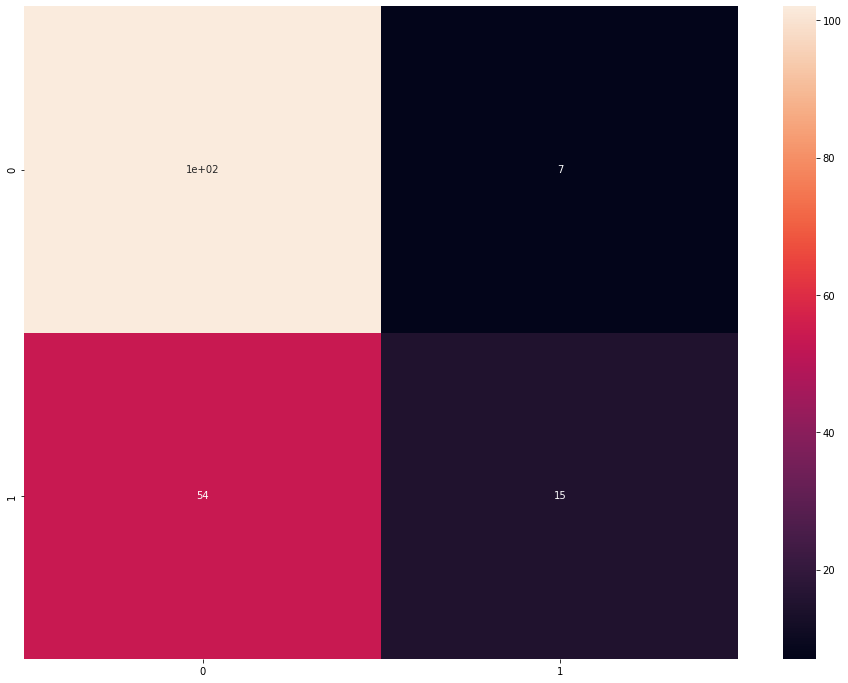

In [41]:
plt.figure(figsize=(16, 12))
sns.heatmap(con_mat, annot=True)
plt.show()

In [42]:
y_preds = classifier.predict(X_test)

In [43]:
from sklearn.model_selection import cross_val_score
logistic_clf_model = LogisticRegression(random_state=42)
cv_score = cross_val_score(logistic_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.65734266 0.65492958 0.69014085 0.65492958 0.69014085]
0.669496700482616


In [44]:
from sklearn.svm import SVC
svc_clf_model = SVC(gamma="auto", random_state=42)
cv_score = cross_val_score(svc_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.65034965 0.71126761 0.71830986 0.68309859 0.73239437]
0.6990840145769723


In [45]:
from sklearn.naive_bayes import GaussianNB
gnb_clf_model = GaussianNB()
cv_score = cross_val_score(gnb_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.63636364 0.69014085 0.6971831  0.65492958 0.65492958]
0.6667093469910371


In [46]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf_model = MultinomialNB()
cv_score = cross_val_score(mnb_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.43356643 0.40140845 0.38028169 0.3943662  0.4084507 ]
0.40361469516399096


In [47]:
from sklearn.linear_model import SGDClassifier
sgd_clf_model = SGDClassifier()
cv_score = cross_val_score(sgd_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.63636364 0.65492958 0.71830986 0.65492958 0.69014085]
0.6709346991037133


In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf_model = KNeighborsClassifier(n_neighbors=5)
cv_score = cross_val_score(neigh_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.68531469 0.71830986 0.77464789 0.76760563 0.73239437]
0.7356544863587117


In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_clf_model = DecisionTreeClassifier(random_state=42)
cv_score = cross_val_score(dt_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.71328671 0.79577465 0.79577465 0.78169014 0.76760563]
0.7708263567418497


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_model = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)
cv_score = cross_val_score(rf_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.83916084 0.85915493 0.84507042 0.82394366 0.82394366]
0.8382547030434354


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=7, random_state=42)
cv_score = cross_val_score(gb_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.73426573 0.85211268 0.84507042 0.80985915 0.81690141]
0.8116418792475131


In [52]:
from lightgbm import LGBMClassifier
lgbm_clf_model = LGBMClassifier(learning_rate=0.1, n_estimators=150, max_depth=7, random_state=42)
cv_score = cross_val_score(lgbm_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.78321678 0.84507042 0.82394366 0.80985915 0.83098592]
0.8186151876292721


In [53]:
import xgboost as xgb
xgb_clf_model = xgb.XGBClassifier(random_state=42)
cv_score = cross_val_score(xgb_clf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[04:47:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:47:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:47:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:47:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [54]:
rf_clf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=150, random_state=42)

In [55]:
y_preds = rf_clf_model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_dataset.PassengerId,
                      'Survived': y_preds})
output.to_csv('submission.csv', index=False)